In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.colors as colors


import os, sys, time, inspect
from fractions import Fraction
from scipy.constants import golden_ratio

import astropy.constants as const
import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo
from fractions import Fraction

import hasasia.sensitivity as hassens
import hasasia.sim as hassim
import hasasia.skymap as hassky

current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index('Research')
save_path_idx = splt_path.index('DetectorDesignSensitivities')
save_directory = "/".join(splt_path[0:save_path_idx+1])
top_directory = "/".join(splt_path[0:top_path_idx+1])

gwent_path = top_directory + '/gwent/'

sys.path.insert(0,gwent_path)

import gwent
import gwent.detector as detector
import gwent.binary as binary

In [3]:
import gwinc
from gwinc import gwinc as gwinc_comm
from gwinc import struct
from gwinc import nb

In [4]:
freqs = np.logspace(1, 3, 1000)

In [5]:
Budget, ifo, freq_, plot_style = gwinc.load_ifo('aLIGO')
ifo = gwinc.precompIFO(freqs, ifo)
traces = Budget(freqs, ifo=ifo).calc_trace()

/Users/andrewkaiser/anaconda3/envs/gwent-dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


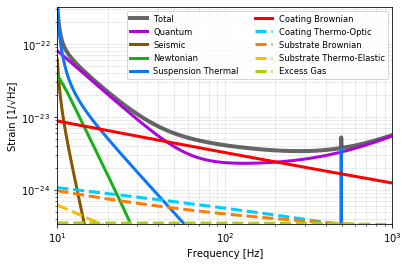

In [6]:
fig = gwinc.plot_noise(freqs, traces, **plot_style)
fig.show()

In [7]:
barf_Budget,barf_ifo,_,_ = gwinc.load_ifo('aLIGO')
barf_copy_ifo = gwinc.precompIFO(freqs, barf_ifo)
barf_psd = barf_Budget(freqs,ifo=barf_copy_ifo).calc()

In [8]:
"""print(barf_Budget)
print(vars(barf_Budget))
print(vars(barf_ifo))
print(barf_copy_ifo)"""
for att in dir(barf_Budget):
    if not att[0].startswith('_'):
        print (att, ': ', getattr(barf_Budget,att))
        print('')

cal_for_noise :  <function Budget.cal_for_noise at 0x1166ec200>

calc :  <function Budget.calc at 0x1166ec320>

calc_noise :  <function Budget.calc_noise at 0x1166ec290>

calc_trace :  <function Budget.calc_trace at 0x1166ec3b0>

freq :  <property object at 0x1166e9110>

interpolate :  <function BudgetItem.interpolate at 0x1166e89e0>

items :  <function Budget.items at 0x1166e8ef0>

keys :  <function Budget.keys at 0x1166e8dd0>

load :  <function Budget.load at 0x1166ec0e0>

name :  Advanced LIGO

noises :  [<class 'gwinc.ifo.noises.QuantumVacuum'>, <class 'gwinc.ifo.noises.Seismic'>, <class 'gwinc.ifo.noises.Newtonian'>, <class 'gwinc.ifo.noises.SuspensionThermal'>, <class 'gwinc.ifo.noises.CoatingBrownian'>, <class 'gwinc.ifo.noises.CoatingThermoOptic'>, <class 'gwinc.ifo.noises.SubstrateBrownian'>, <class 'gwinc.ifo.noises.SubstrateThermoElastic'>, <class 'gwinc.ifo.noises.ExcessGas'>]

references :  []

style :  {}

update :  <function Budget.update at 0x1166ec170>

values :  <func

In [9]:
for att in dir(barf_copy_ifo):
    if not att[0].startswith('_'):
        print (att, ': ', getattr(barf_copy_ifo,att))
        print('')

Infrastructure :  <GWINC Struct: ['Length', 'Temp', 'ResidualGas']>

Laser :  <GWINC Struct: ['Wavelength', 'Power']>

Materials :  <GWINC Struct: ['MassRadius', 'MassThickness', 'Coating', 'Substrate', 'MirrorVolume', 'MirrorMass']>

Optics :  <GWINC Struct: ['Type', 'PhotoDetectorEfficiency', 'Loss', 'BSLoss', 'coupling', 'SubstrateAbsorption', 'pcrit', 'Quadrature', 'ITM', 'ETM', 'PRM', 'SRM', 'Curvature']>

Seismic :  <GWINC Struct: ['Site', 'KneeFrequency', 'LowFrequencyLevel', 'Gamma', 'Rho', 'Beta', 'Omicron', 'TestMassHeight', 'RayleighWaveSpeed']>

Suspension :  <GWINC Struct: ['Type', 'FiberType', 'BreakStress', 'Temp', 'Silica', 'C70Steel', 'MaragingSteel', 'Silicon', 'Stage', 'Ribbon', 'Fiber', 'VHCoupling', 'hForce', 'vForce', 'hForce_singlylossy', 'vForce_singlylossy', 'hTable', 'vTable']>

TCS :  <GWINC Struct: ['s_cc', 's_cs', 's_ss', 'SRCloss']>

diff :  <bound method Struct.diff of <gwinc.struct.Struct object at 0x118aa2fd0>>

from_dict :  <bound method Struct.from_di

In [10]:
tmp = barf_Budget(freqs,ifo=barf_copy_ifo)
for att in dir(tmp):
    if not att[0].startswith('_') and att != 'args':
        if isinstance(getattr(tmp,att),np.ndarray):
            print (att, ': array of shape', np.shape(getattr(tmp,att)))
            print('')
        else:
            print (att, ': ', getattr(tmp,att))
            print('')

cal_for_noise :  <bound method Budget.cal_for_noise of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

calc :  <bound method Budget.calc of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

calc_noise :  <bound method Budget.calc_noise of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

calc_trace :  <bound method Budget.calc_trace of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

freq : array of shape (1000,)

ifo :  <GWINC Struct: ['Infrastructure', 'TCS', 'Seismic', 'Suspension', 'Materials', 'Laser', 'Optics', 'gwinc']>

interpolate :  <bound method BudgetItem.interpolate of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

items :  <bound method Budget.items of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

keys :  <bound method Budget.keys of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

kwargs :  {'ifo': <gwinc.struct.Struct object at 0x118aa2fd0>}

load :  <bound method Budget.load of <gwinc.ifo.aLIGO.aLIGO object at 0x118ba9a90>>

name :  Advanced LIGO

noises :  [<class 'gwinc

In [11]:
for key in barf_copy_ifo.keys():
    print(key)

Infrastructure
TCS
Seismic
Suspension
Materials
Laser
Optics
gwinc


In [12]:
[print('yes!') for key in barf_copy_ifo['Infrastructure'].keys() if 'Length' in key]
gwinc.available_ifos()

yes!


['Aplus', 'CE1', 'CE2', 'Voyager', 'aLIGO']

In [13]:
name = 'are in aLIGO'
tmp = [word for word in name.split() if word in gwinc.available_ifos()]
print(tmp)

['aLIGO']


In [14]:
ass_Budget,ass_ifo,_,_ = gwinc.load_ifo('aLIGO')
ass_copy_ifo = gwinc.precompIFO(freqs, ass_ifo)
setattr(ass_copy_ifo.Infrastructure,'Length',20000)
setattr(ass_copy_ifo.Laser,'Wavelength',1e-5)
ass_psd = ass_Budget(freqs,ifo=ass_copy_ifo).calc()
#ass_Budget_real = ass_Budget(freqs,ifo=ass_copy_ifo)
#ass_Budget_real.update(QuantumVacuum=5000)
#ass_psd = ass_Budget_real.calc()

/Users/andrewkaiser/anaconda3/envs/gwent-dev/lib/python3.7/site-packages/gwinc/noise/residualgas.py:40: RuntimeWarning: invalid value encountered in sqrt
  waist = waist * sqrt(((g1*g2)*(1-g1*g2))/((g1+g2-2*g1*g2)**2))
/Users/andrewkaiser/anaconda3/envs/gwent-dev/lib/python3.7/site-packages/gwinc/noise/residualgas.py:54: RuntimeWarning: invalid value encountered in less
  zint[zint < 0] = 0


In [15]:
print(getattr(barf_copy_ifo.Infrastructure,'Length'))
print(getattr(ass_copy_ifo.Infrastructure,'Length'))
print(getattr(barf_copy_ifo.Laser,'Wavelength'))
print(getattr(ass_copy_ifo.Laser,'Wavelength'))

3995
20000
1.064e-06
1e-05


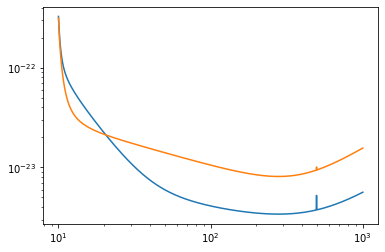

In [16]:
plt.loglog(freqs,np.sqrt(barf_psd))
plt.loglog(freqs,np.sqrt(ass_psd))

In [17]:
def print_item_value_list(ifo):
    i=0
    for key_1,item_1 in ifo.items():
        print(key_1,'Parameters:')
        for key_2, item_2 in item_1.items():
            if isinstance(item_2,np.ndarray):
                i+=1
                print('    ',key_2,': array of shape',item_2.shape)
            elif isinstance(item_2,list):
                i+=1
                print('    ',key_2,': array of shape',len(item_2))
            elif isinstance(item_2,(int,float)):
                i+=1
                print('    ',key_2,':',item_2)
            elif isinstance(item_2,gwinc.struct.Struct):
                print('    ',key_2,'Subparameters:')
                for key_3, item_3 in item_2.items():
                    if isinstance(item_3,np.ndarray):
                        i+=1
                        print('    ','    ',key_3,': array of shape',item_3.shape)
                    elif isinstance(item_3,list):
                        i+=1
                        print('    ','    ',key_3,': array of shape',len(item_3))
                    elif isinstance(item_3,(int,float)):
                        i+=1
                        print('    ','    ',key_3,':',item_3)
            else:
                i+=1
                print('    ',key_2,':',item_2)

    print(' ')
    print('Number of Variables: ',i)

In [18]:
print_item_value_list(barf_copy_ifo)

Infrastructure Parameters:
     Length : 3995
     Temp : 290
     ResidualGas Subparameters:
          pressure : 4e-07
          mass : 3.35e-27
          polarizability : 7.8e-31
TCS Parameters:
     s_cc : 7.024
     s_cs : 7.321
     s_ss : 7.631
     SRCloss : 0.0
Seismic Parameters:
     Site : LHO
     KneeFrequency : 10
     LowFrequencyLevel : 1e-09
     Gamma : 0.8
     Rho : 1800.0
     Beta : 0.8
     Omicron : 1
     TestMassHeight : 1.5
     RayleighWaveSpeed : 250
Suspension Parameters:
     Type : Quad
     FiberType : Tapered
     BreakStress : 750000000.0
     Temp : 290
     Silica Subparameters:
          Rho : 2200.0
          C : 772
          K : 1.38
          Alpha : 3.9e-07
          dlnEdT : 0.000152
          Phi : 4.1e-10
          Y : 72000000000.0
          Dissdepth : 0.015
     C70Steel Subparameters:
          Rho : 7800
          C : 486
          K : 49
          Alpha : 1.2e-05
          dlnEdT : -0.00025
          Phi : 0.0002
          Y : 212000

In [19]:
print_item_value_list(ass_copy_ifo)

Infrastructure Parameters:
     Length : 20000
     Temp : 290
     ResidualGas Subparameters:
          pressure : 4e-07
          mass : 3.35e-27
          polarizability : 7.8e-31
TCS Parameters:
     s_cc : 7.024
     s_cs : 7.321
     s_ss : 7.631
     SRCloss : 0.0
Seismic Parameters:
     Site : LHO
     KneeFrequency : 10
     LowFrequencyLevel : 1e-09
     Gamma : 0.8
     Rho : 1800.0
     Beta : 0.8
     Omicron : 1
     TestMassHeight : 1.5
     RayleighWaveSpeed : 250
Suspension Parameters:
     Type : Quad
     FiberType : Tapered
     BreakStress : 750000000.0
     Temp : 290
     Silica Subparameters:
          Rho : 2200.0
          C : 772
          K : 1.38
          Alpha : 3.9e-07
          dlnEdT : 0.000152
          Phi : 4.1e-10
          Y : 72000000000.0
          Dissdepth : 0.015
     C70Steel Subparameters:
          Rho : 7800
          C : 486
          K : 49
          Alpha : 1.2e-05
          dlnEdT : -0.00025
          Phi : 0.0002
          Y : 21200

In [20]:
load_directory = gwent.__path__[0] + '/LoadFiles'
save_directory += '/Figures/'

In [21]:
Ground_T_obs = 4*u.yr

In [22]:
#aLIGO
aLIGO_filedirectory = load_directory + '/InstrumentFiles/aLIGO/'
aLIGO_1_filename = 'aLIGODesign.txt'
aLIGO_2_filename = 'ZERO_DET_high_P.txt'

aLIGO_1_filelocation = aLIGO_filedirectory + aLIGO_1_filename
aLIGO_2_filelocation = aLIGO_filedirectory + aLIGO_2_filename

aLIGO_1 = detector.GroundBased('aLIGO 1',Ground_T_obs,load_location=aLIGO_1_filelocation,I_type='A')
aLIGO_2 = detector.GroundBased('aLIGO 2',Ground_T_obs,load_location=aLIGO_2_filelocation,I_type='A')

In [23]:
#Einstein Telescope
ET_filedirectory = load_directory + '/InstrumentFiles/EinsteinTelescope/'
ET_B_filename = 'ET_B_data.txt'
ET_C_filename = 'ET_C_data.txt'
ET_D_filename = 'ET_D_data.txt'

ET_B_filelocation = ET_filedirectory + ET_B_filename
ET_C_filelocation = ET_filedirectory + ET_C_filename
ET_D_filelocation = ET_filedirectory + ET_D_filename

ET_B = detector.GroundBased('ET',Ground_T_obs,load_location=ET_B_filelocation,I_type='A')
ET_C = detector.GroundBased('ET',Ground_T_obs,load_location=ET_C_filelocation,I_type='A')
ET_D = detector.GroundBased('ET',Ground_T_obs,load_location=ET_D_filelocation,I_type='A')

In [30]:
gwinc_dict = {'Infrastructure':{'Length':3000,'Temp':[500,20,30]},'Laser':{'Wavelength':1e-5,'Power':130}}
print(gwinc_dict)

{'Infrastructure': {'Length': 3000, 'Temp': [500, 20, 30]}, 'Laser': {'Wavelength': 1e-05, 'Power': 130}}


In [37]:
aLIGO_gwinc = detector.GroundBased('aLIGO gwinc',Ground_T_obs,noise_dict=gwinc_dict)

In [38]:
CE1_gwinc = detector.GroundBased('CE1 gwinc',Ground_T_obs)

In [39]:
print(aLIGO_gwinc.var_dict)

{'T_obs': {'val': <Quantity 4. yr>, 'min': None, 'max': None}, 'Infrastructure Length': {'val': 3000, 'min': None, 'max': None}, 'Infrastructure Temp': {'val': 500, 'min': 20, 'max': 30}, 'Laser Wavelength': {'val': 1e-05, 'min': None, 'max': None}, 'Laser Power': {'val': 130, 'min': None, 'max': None}}


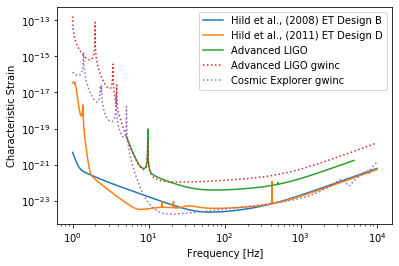

In [27]:
fig = plt.figure()
plt.loglog(ET_B.fT,ET_B.h_n_f,label='Hild et al., (2008) ET Design B')
#plt.loglog(ET_C.fT,ET_C.h_n_f,label='Einstein Telescope Design C')
plt.loglog(ET_D.fT,ET_D.h_n_f,label='Hild et al., (2011) ET Design D')
plt.loglog(aLIGO_1.fT,aLIGO_1.h_n_f,label='Advanced LIGO')
plt.loglog(aLIGO_gwinc.fT,aLIGO_gwinc.h_n_f,label='Advanced LIGO gwinc',linestyle=':')
plt.loglog(CE1_gwinc.fT,CE1_gwinc.h_n_f,label='Cosmic Explorer gwinc',linestyle=':')
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Characteristic Strain')
plt.tick_params(axis = 'both',which = 'major')
plt.legend()
fig.savefig(save_directory+'all_ground_comp.pdf',bbox_inches='tight')
plt.show()